# Машинное обучение, ФКН ВШЭ

## Практическое задание. Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

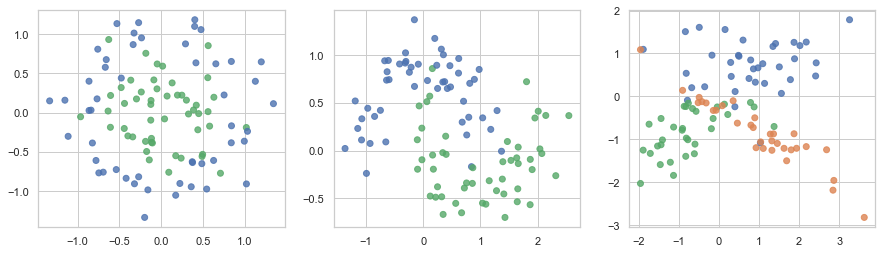

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание(1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    #plt.title("title")

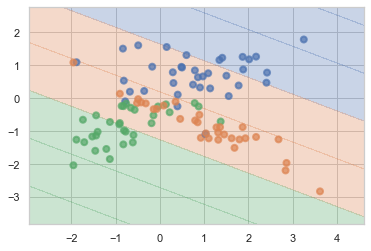

In [10]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

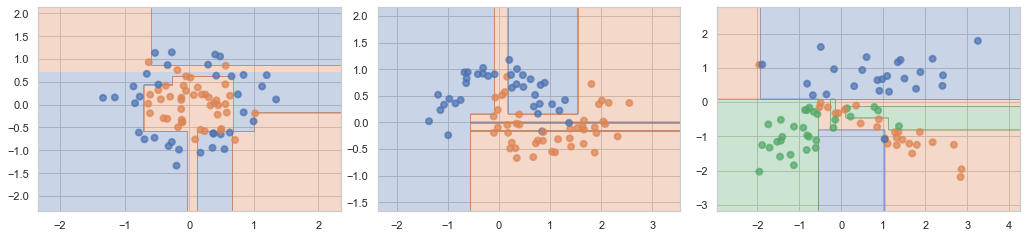

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 4))
acc = []
for i in range(len(datasets)):
    ar = []
    X_train, X_test, y_train, y_test = train_test_split(datasets[i][0],datasets[i][1],test_size=0.2,random_state=42)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    ar.append(accuracy_score(y_train,model.predict(X_train)))
    ar.append(accuracy_score(y_test,model.predict(X_test)))
    acc.append(ar)
    plt.subplot(1, 3, i + 1)
    plot_surface(model,X_train,y_train)

In [14]:
acc

[[1.0, 0.7], [1.0, 0.95], [1.0, 0.7]]

__Ответ:__ да, видно, что деревья достаточно сильно переобучились из-за отсутсвия ограничений на модели, что указывает нам accuracy = 1 на обучающей выборке и более низкий показатель на тестовой

__Задание(1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

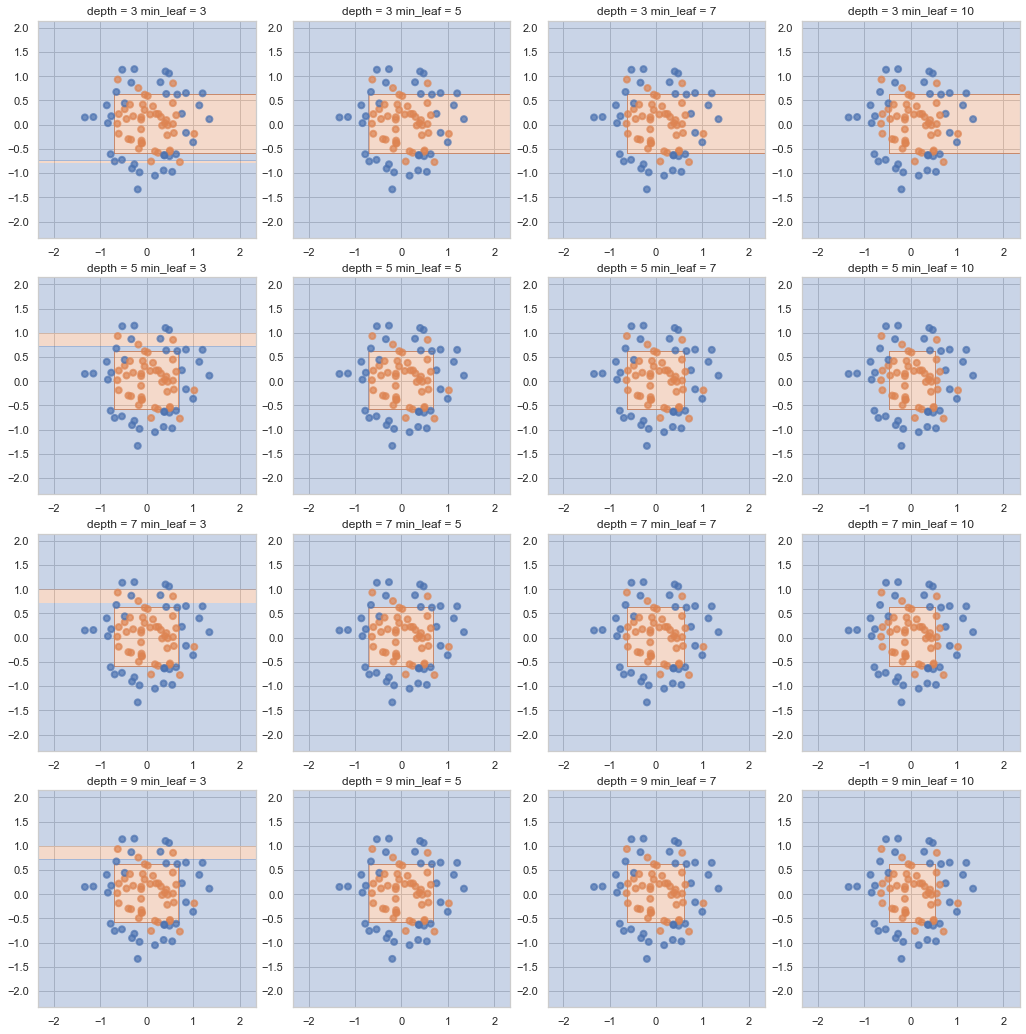

In [40]:
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(15, 15))
depth = [3,5,7,9]
leaf = [3,5,7,10]
acc = []

#for k in range(len(datasets)):
X_train, X_test, y_train, y_test = train_test_split(datasets[0][0],datasets[0][1],test_size=0.2,random_state=42)
acc = []
k=1
for i in depth:
    for j in leaf:
        ar=[]
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j)
        model.fit(X_train,y_train)
        ar.append(accuracy_score(y_train,model.predict(X_train)))
        ar.append(accuracy_score(y_test,model.predict(X_test)))
        plt.subplot(4, 4, k)
        plt.title(f"depth = {i} min_leaf = {j}")
        plot_surface(model,X_train,y_train)
        acc.append(ar)
        k+=1

In [39]:
acc

[[0.8875, 0.75],
 [0.8875, 0.75],
 [0.8875, 0.75],
 [0.8875, 0.75],
 [0.9, 0.75],
 [0.9, 0.7],
 [0.9, 0.7],
 [0.8875, 0.75],
 [0.925, 0.75],
 [0.9, 0.7],
 [0.9, 0.7],
 [0.8875, 0.75],
 [0.925, 0.7],
 [0.9, 0.7],
 [0.9, 0.7],
 [0.8875, 0.75]]

__Ответ:__ из графиков видно, что с увеличиние грубины дерева и уменьшение min_sample_leaf модель становится более сложной и начинает немного переобучаться

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание(1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [6]:
from collections import Counter


def find_best_split(feature_vector, target_vector):
    thresholds, ginis, thresholds_best, gini_best = [], [], 0, -10 ** 9
    # feature_vector.sort()
    l = len(feature_vector)
    uniq = list(set(feature_vector))
    uniq.sort()
    if len(uniq) == 1:
        return thresholds, ginis, feature_vector[0], gini_best
    for i in range(0, len(uniq) - 1):
        t = (uniq[i + 1] + uniq[i]) / 2
        thresholds.append(t)
        left = target_vector[feature_vector < t]
        right = target_vector[feature_vector >= t]
        p1L = left.mean()
        p1R = right.mean()
        gin_left = 1 - p1L ** 2 - (1 - p1L) ** 2
        gin_right = 1 - p1R ** 2 - (1 - p1R) ** 2
        ginis.append(-(len(left) * gin_left + len(right) * gin_right) / l)
        if ginis[-1] > gini_best:
            gini_best = ginis[-1]
            thresholds_best = thresholds[-1]
    return np.array(thresholds), np.array(ginis), thresholds_best, gini_best

__Задание(0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [259]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


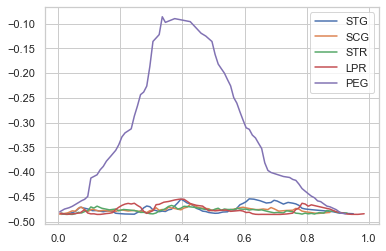

In [264]:
for i in range(len(df.columns)-1):
    a,b,_,_ = find_best_split(df.iloc[:,i],df['UNS'])
    plt.plot(a,b,label=df.columns[i])
plt.legend()

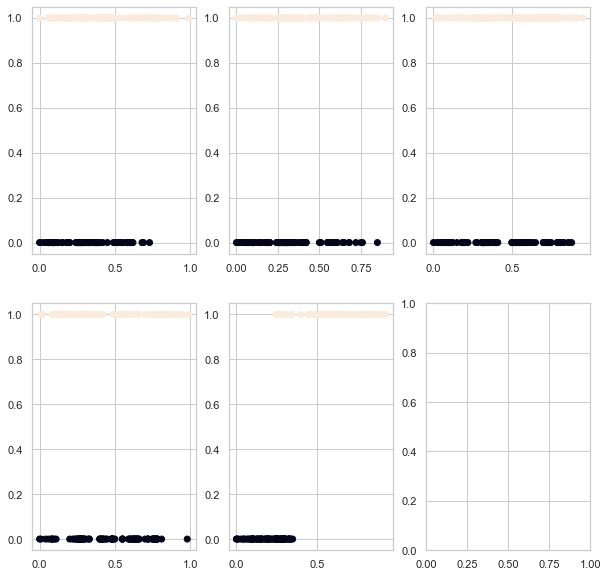

In [271]:
fig, axs = plt.subplots(2, 3,figsize=(10,10))
axs[0, 0].scatter(df.loc[:,'STG'],df.loc[:,'UNS'],c=df.loc[:,'UNS'])
axs[0, 1].scatter(df.loc[:,'SCG'],df.loc[:,'UNS'],c=df.loc[:,'UNS'])
axs[0, 2].scatter(df.loc[:,'STR'],df.loc[:,'UNS'],c=df.loc[:,'UNS'])
axs[1, 0].scatter(df.loc[:,'LPR'],df.loc[:,'UNS'],c=df.loc[:,'UNS'])
axs[1, 1].scatter(df.loc[:,'PEG'],df.loc[:,'UNS'],c=df.loc[:,'UNS'])

In [300]:
t = np.array(map(int,[1,2,3]))
q=np.array(list(map(lambda x: 5, [1,2,3,3,4])))
len(q)

5

__Задание(0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** SEG - да, согласуется 

In [7]:
cat = ['real','categorical', 'real','categorical','categorical']
x = '0.015696372114428918 2.0 0.12471295376821585 1.0 0.0 -2.2426849541854055 1.0 -0.32279480560829565 2.0 0.0 1.150035724719818 2.0 0.8416747129961416 2.0 1.0 0.9919460223426778 0.0 2.390960515463033 1.0 0.0 0.9533241281124304 2.0 0.07619958783723642 2.0 1.0 -2.0212548201949705 2.0 -0.5664459304649568 0.0 2.0 -0.334077365808097 0.0 0.036141936684072715 1.0 1.0 0.002118364683486495 1.0 -2.0749776006900293 0.0 1.0 0.405453411570191 1.0 0.24779219974854666 1.0 2.0 0.2890919409800353 0.0 -0.8971567844396987 2.0 2.0'
y='1 1 0 0 1 0 0 0 0 0'
y=np.array([int(r) for r in y.split()])
x=[float(r) for r in x.split()]
t='0.9533241281124304 2.0 -0.32279480560829565 0.0 0.0 0.2890919409800353 0.0 -2.0749776006900293 1.0 1.0 -2.0212548201949705 2.0 2.390960515463033 0.0 2.0 1.150035724719818 0.0 0.12471295376821585 1.0 1.0 -0.334077365808097 0.0 -0.8971567844396987 2.0 2.0 0.405453411570191 1.0 0.8416747129961416 1.0 1.0 0.9919460223426778 1.0 0.24779219974854666 1.0 0.0 -2.2426849541854055 1.0 0.07619958783723642 2.0 1.0 0.015696372114428918 2.0 0.036141936684072715 2.0 0.0 0.002118364683486495 2.0 -0.5664459304649568 2.0 2.0'
t=[float(e) for e in t.split()]
X=[]
for i in range(len(x)//5):
    temp =[]
    for j in range(5):
        temp.append(x[i*5+j])
    X.append(temp)
X=np.array(X)
test=[]
for i in range(len(t)//5):
    temp =[]
    for j in range(5):
        temp.append(t[i*5+j])
    test.append(temp)
test=np.array(test)

In [112]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    thresholds, ginis, thresholds_best, gini_best = [], [], feature_vector[0], -10 ** 9
    ind = np.argsort(feature_vector)
    feature_vector = feature_vector[ind]
    target_vector = target_vector[ind]
    l = len(feature_vector)
    ones = 0
    men = target_vector.sum()
    for i in range(0, l - 1):
        ones += target_vector[i]
        if feature_vector[i + 1] == feature_vector[i]:
            continue
        t = (feature_vector[i + 1] + feature_vector[i]) / 2
        thresholds.append(t)
        p1L = ones / (i + 1)
        p1R = (men - ones) / (l - i - 1)
        gin_left = 1 - p1L ** 2 - (1 - p1L) ** 2
        gin_right = 1 - p1R ** 2 - (1 - p1R) ** 2
        ginis.append(-((i + 1) * gin_left + (l - i - 1) * gin_right) / l)
        if ginis[-1] > gini_best:
            gini_best = ginis[-1]
            thresholds_best = thresholds[-1]
    return np.array(thresholds), np.array(ginis), thresholds_best, gini_best


class DecisionTree(BaseEstimator):
    def __init__(self, _feature_types, _max_depth=None, _min_samples_split=None, _min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", _feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = _feature_types
        self._max_depth = _max_depth
        self._min_samples_split = _min_samples_split
        self._min_samples_leaf = _min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth):
        node["depth"] = depth
        if (self._max_depth is not None and depth == self._max_depth) or (self._min_samples_split is not None and
                                                                          len(sub_X) < self._min_samples_split):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            # if self._min_samples_split is not None and len(feature_vector) < self._min_samples_split or \
            #         (self._min_samples_leaf is not None and len(feature_vector) <= self._min_samples_leaf):
            #     continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if (gini_best is None or gini > gini_best) and gini != -10 ** 9 and (self._min_samples_leaf is None or (
                    self._min_samples_leaf is not None and (
                    feature_vector < threshold).sum() >= self._min_samples_leaf and
                    (feature_vector >= threshold).sum() >= self._min_samples_leaf
            )):
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        r = node
        while r["type"] != "terminal":
            if self._feature_types[r["feature_split"]] == "real":
                if x[r["feature_split"]] < r["threshold"]:
                    r = r["left_child"]
                else:
                    r = r["right_child"]
            else:
                if x[r["feature_split"]] in r["categories_split"]:
                    r = r["left_child"]
                else:
                    r = r["right_child"]
        return r["class"]

    def fit(self, X, y):
        self._fit_node(X, y, self._tree, 0)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание(1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание(0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [171]:
df = pd.read_csv('agaricus-lepiota.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


1 - poisonous

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [173]:
names = [str(i) for i in x_train.columns]
x_train.columns = names

In [23]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(0,axis=1),df[0],test_size=0.5)

In [59]:
feature_types = ["real"]*22
tree = DecisionTree(feature_types)
tree.fit(np.array(x_train),np.array(y_train))

In [62]:
res = tree.predict(np.array(x_test))
accuracy_score(y_test,res)

1.0

__Задание 8. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [181]:
from sklearn.model_selection import cross_val_score
types1 = ["real"]*len(df.columns)
types2 = ["categorical"]*len(df.columns)
types3 = ["real"]*(ohe.fit_transform(df.drop(0,axis=1))).shape[1]
model1 = DecisionTree(_feature_types=types1)
model2 = DecisionTree(_feature_types=types2)
model3 = DecisionTree(_feature_types=types3)
model4 = DecisionTreeClassifier()
resTicTac['mushrooms'].append(cross_val_score(model1,np.array(df.drop(0,axis=1)),np.array(df[0]),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['mushrooms'].append(cross_val_score(model2,np.array(df.drop(0,axis=1)),np.array(df[0]),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['mushrooms'].append(cross_val_score(model3,np.array(ohe.fit_transform(df.drop(0,axis=1))),
                                           np.array(df[0]),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['mushrooms'].append(cross_val_score(model4,np.array(df.drop(0,axis=1)),np.array(df[0]),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())

In [178]:
resTicTac['mushrooms']

[0.9992610837438424, 1.0, 0.9996305418719211, 0.956689025018329]

In [216]:
tic_tac = pd.read_csv('tic-tac-toe-endgame.csv')
tic_tac.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [217]:
for i in tic_tac.columns:
    tic_tac[i] = le.fit_transform(tic_tac[i])
tic_tac.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [218]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder

In [219]:
ohe = OneHotEncoder(sparse=False)

In [220]:
resTicTac = {'ticTac':[],'cars':[],'nurc':[],'mushrooms':[]}
from sklearn.model_selection import cross_val_score
types1 = ["real"]*len(tic_tac.columns)
types2 = ["categorical"]*len(tic_tac.columns)
types3 = ["real"]*27
model1 = DecisionTree(_feature_types=types1)
model2 = DecisionTree(_feature_types=types2)
model3 = DecisionTree(_feature_types=types3)
model4 = DecisionTreeClassifier()
resTicTac['ticTac'].append(cross_val_score(model1,np.array(tic_tac.drop('V10',axis=1)),np.array(tic_tac['V10']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['ticTac'].append(cross_val_score(model2,np.array(tic_tac.drop('V10',axis=1)),np.array(tic_tac['V10']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['ticTac'].append(cross_val_score(model3,np.array(ohe.fit_transform(tic_tac.drop('V10',axis=1))),
                                           np.array(tic_tac['V10']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['ticTac'].append(cross_val_score(model4,tic_tac.drop('V10',axis=1),np.array(tic_tac['V10']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())

In [221]:
resTicTac['ticTac']

[0.4675328947368421,
 0.5414583333333333,
 0.5435745614035088,
 0.7946162280701754]

In [153]:
nurc = pd.read_csv('nursery.data')
nurc.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [154]:
for i in nurc.columns:
    if i!='recommend':
        nurc[i] = le.fit_transform(nurc[i])
nurc['recommend'].replace({'not_recom':0,'recommend':0,'priority':1,'spec_prior':1,'very_recom':1},inplace=True)
nurc.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2,0
3,2,3,0,0,0,0,2,1,1
4,2,3,0,0,0,0,2,0,0


In [156]:
types1 = ["real"]*len(nurc.columns)
types2 = ["categorical"]*len(nurc.columns)
types3 = ["real"]*(ohe.fit_transform(nurc.drop('recommend',axis=1))).shape[1]
model1 = DecisionTree(_feature_types=types1)
model2 = DecisionTree(_feature_types=types2)
model3 = DecisionTree(_feature_types=types3)
model4 = DecisionTreeClassifier()
resTicTac['nurc'].append(cross_val_score(model1,np.array(nurc.drop('recommend',axis=1)),np.array(nurc['recommend']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['nurc'].append(cross_val_score(model2,np.array(nurc.drop('recommend',axis=1)),np.array(nurc['recommend']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['nurc'].append(cross_val_score(model3,np.array(ohe.fit_transform(nurc.drop('recommend',axis=1))),
                                          np.array(nurc['recommend']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['nurc'].append(cross_val_score(model4,np.array(nurc.drop('recommend',axis=1)),np.array(nurc['recommend']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())

In [157]:
resTicTac['nurc']

[0.9998456790123458,
 0.9999228395061728,
 0.9997685185185186,
 0.9998456790123458]

In [158]:
cars = pd.read_csv('car.data')
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [159]:
for i in cars.columns:
    if i!='unacc':
        cars[i] = le.fit_transform(cars[i])
cars['unacc'].replace({'unacc':0,'acc':0,'good':1,'vgood':1},inplace=True)
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


In [160]:
types1 = ["real"]*len(cars.columns)
types2 = ["categorical"]*len(cars.columns)
types3 = ["real"]*(ohe.fit_transform(cars.drop('unacc',axis=1))).shape[1]
model1 = DecisionTree(_feature_types=types1)
model2 = DecisionTree(_feature_types=types2)
model3 = DecisionTree(_feature_types=types3)
model4 = DecisionTreeClassifier()
resTicTac['cars'].append(cross_val_score(model1,np.array(cars.drop('unacc',axis=1)),np.array(cars['unacc']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['cars'].append(cross_val_score(model2,np.array(cars.drop('unacc',axis=1)),np.array(cars['unacc']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['cars'].append(cross_val_score(model3,np.array(ohe.fit_transform(cars.drop('unacc',axis=1))),
                                         np.array(cars['unacc']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())
resTicTac['cars'].append(cross_val_score(model4,np.array(cars.drop('unacc',axis=1)),np.array(cars['unacc']),
                                 cv=10, scoring=make_scorer(accuracy_score)).mean())

In [161]:
resTicTac['cars']

[0.9425998118026616,
 0.9675191558005108,
 0.9217670385804544,
 0.9449522785320607]